In [1]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#input
def get_dataset(title, ts_name=None):
    ts_id = None
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()
    if ts_name is not None:
        ts_id = dataset.timeseries_set.all().filter(name=ts_name).first().id

    return dataset, training_dataset, ts_id

In [3]:
def lisa_pearson_detection_time_it(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10):
    %timeit lisa_pearson(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size)

In [4]:
def lisa_dtw_detection_time_it(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10):
    %timeit lisa_dtw(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size, distance_function='euclidean')

In [5]:
def lisa_geo_detection_time_it(df, df_class, time_series_id, maximize_score='F1-Score'):
    %timeit lisa_geo(df, df_class, time_series_id, maximize_score=maximize_score)

In [6]:
def rpca_detection_time_it(df, df_class, df_train, df_train_class, delta=1, n_components=2, maximize_score='F1-Score', train_size=0.5):
    %timeit robust_pca_huber_loss(df, df_class, df_train, df_train_class, delta=delta, n_components=n_components, maximize_score=maximize_score, train_size=train_size)

In [7]:
def histogram_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', train_size=0.5):
    %timeit histogram(df, df_class, df_train, df_train_class, maximize_score=maximize_score, train_size=train_size)

In [8]:
def cluster_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_components=3, n_init=3, train_size=0.5):
    %timeit cluster_gaussian_mixture(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_components=n_components, n_init=n_init, train_size=train_size)

In [9]:
def svm_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', nu=0.95, kernel='rbf', train_size=0.5):
    %timeit svm(df, df_class, df_train, df_train_class, maximize_score=maximize_score, nu=nu, kernel=kernel, train_size=train_size)

In [10]:
def isolation_forest_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_jobs=-1, bootstrap=False, n_estimators=40, train_size=0.5):
    %timeit isolation_forest(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_jobs=n_jobs, bootstrap=bootstrap, n_estimators=n_estimators, train_size=train_size)

In [11]:
# Temp1 - TS LENGTH
dataset_names = ['Idaweb Swiss Temperature TS8 200', 
                 'Idaweb Swiss Temperature TS8 400', 
                 'Idaweb Swiss Temperature TS8 600', 
                 'Idaweb Swiss Temperature TS8 800', 
                 'Idaweb Swiss Temperature TS8']
ts_name = 'REH'

In [13]:
# TIME TS LENGTH - Pearson
for dataset_name in dataset_names:
    dataset, _, ts_id = get_dataset(dataset_name, ts_name)
    lisa_pearson_detection_time_it(dataset.dataframe, dataset.dataframe_class, ts_id)

1.42 s ± 34.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.68 s ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.01 s ± 7.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.37 s ± 44.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.73 s ± 53.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
# TIME TS LENGTH - DTW
for dataset_name in dataset_names:
    dataset, _, ts_id = get_dataset(dataset_name, ts_name)
    lisa_dtw_detection_time_it(dataset.dataframe, dataset.dataframe_class, ts_id)

2.35 s ± 42.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.7 s ± 86.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.08 s ± 48.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.37 s ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.65 s ± 213 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
# TIME TS LENGTH - LISA VANILLA
for dataset_name in dataset_names:
    dataset, _, ts_id = get_dataset(dataset_name, ts_name)
    lisa_geo_detection_time_it(dataset.dataframe, dataset.dataframe_class, ts_id)

1.54 s ± 6.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.86 s ± 15.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.21 s ± 10.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.52 s ± 16.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.88 s ± 29.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
# TIME TS LENGTH - RPCA
for dataset_name in dataset_names:
    dataset, training_dataset, _ = get_dataset(dataset_name)
    rpca_detection_time_it(dataset.dataframe, dataset.dataframe_class, training_dataset.dataframe, training_dataset.dataframe_class)

2.43 s ± 82.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.5 s ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.67 s ± 56.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.64 s ± 36.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.75 s ± 90.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
# TIME TS LENGTH - HISTOGRAM
for dataset_name in dataset_names:
    dataset, training_dataset, _ = get_dataset(dataset_name)
    histogram_detection_time_it(dataset.dataframe, dataset.dataframe_class, training_dataset.dataframe, training_dataset.dataframe_class)

2.35 s ± 42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.39 s ± 37.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.48 s ± 76.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.56 s ± 42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.7 s ± 63.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
# TIME TS LENGTH - CLUSTER
for dataset_name in dataset_names:
    dataset, training_dataset, _ = get_dataset(dataset_name)
    cluster_detection_time_it(dataset.dataframe, dataset.dataframe_class, training_dataset.dataframe, training_dataset.dataframe_class)

2.44 s ± 65.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.48 s ± 66.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.48 s ± 42.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.66 s ± 44.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.7 s ± 58.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
# TIME TS LENGTH - SVM
for dataset_name in dataset_names:
    dataset, training_dataset, _ = get_dataset(dataset_name)
    svm_detection_time_it(dataset.dataframe, dataset.dataframe_class, training_dataset.dataframe, training_dataset.dataframe_class)

2.25 s ± 45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.34 s ± 59.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.45 s ± 53.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.48 s ± 81.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.64 s ± 66.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
# TIME TS LENGTH - ISOLATION FOREST
for dataset_name in dataset_names:
    dataset, training_dataset, _ = get_dataset(dataset_name)
    isolation_forest_detection_time_it(dataset.dataframe, dataset.dataframe_class, training_dataset.dataframe, training_dataset.dataframe_class)

2.65 s ± 47.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.71 s ± 25.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.79 s ± 41.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.86 s ± 30.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.94 s ± 66.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [2]:
dimension = np.array([200, 400, 600, 800, 1000])

lisa_pearson_results = np.array([1.42, 1.68, 2.01, 2.37, 2.73])
lisa_dtw_results = np.array([2.35, 3.7, 5.08, 6.37, 7.65])
lisa_spatial_results = np.array([1.54, 1.86, 2.21, 2.52, 2.88])

rpca_results = np.array([2.43, 2.5, 2.67, 2.64, 2.75])
histogram_results = np.array([2.35, 2.39, 2.48, 2.56, 2.7])
cluster_results = np.array([2.44, 2.48, 2.48, 2.66, 2.7])
svm_results = np.array([2.25, 2.34, 2.45, 2.48, 2.64])
isolation_results = np.array([2.65, 2.71, 2.79, 2.86, 2.94])

scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (DTW)', 'scores' : lisa_dtw_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_spatial_results }, 
          { 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [5]:
def generate_timeit_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results, label=title)
    ax.set_ylabel('Run-Time (s)')
    ax.set_xlabel('Length of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

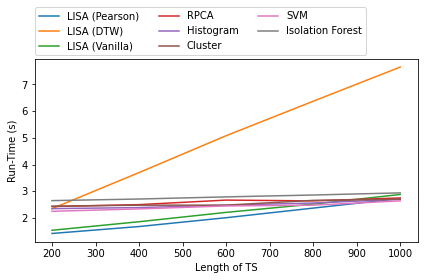

In [6]:
#PLOT
generate_timeit_line_chart(dimension, scores)
